In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.spatial import ConvexHull

import warnings
warnings.filterwarnings('ignore')

# Підвищимо розмір графіків за замовчуванням
# plt.style.use('ggplot')
%config InlineBackend.figure_format = 'svg'
# plt.rcParams['figure.figsize'] = 5, 3
# plt.rcParams['axes.grid'] = True


In [13]:
emotions = ['Anger', 'Fear', 'Joy', 'Neutral', 'Sadness']

labels_eng = ['Anger', 'Fear', 'Joy', 'Neutral', 'Sadness']
labels_ukr = ['Злість', 'Страх', 'Радість', 'Нейтральний', 'Сум']

markers = ['o', 'x', '^', 's', 'D']  # Different markers for different groups
colors = ['tab:blue', 'tab:green', 'tab:red', 'tab:cyan', 'tab:orange']  # Different colors for different groups


In [14]:
# means = {
#     'Anger': np.random.uniform(0, 1, 2),
#     'Fear': np.random.uniform(0, 1, 2),
#     'Joy': np.random.uniform(0, 1, 2),
#     'Neutral': np.random.uniform(0, 1, 2),
#     'Sadness': np.random.uniform(0, 1, 2)
# }

# cov = np.array([[0.01, 0], [0, 0.01]])


In [15]:
# arrays = {}
# all_data = []
# for emotion in emotions:
#     arrays[emotion] = np.random.multivariate_normal(means[emotion], cov, size=11).T
#     emotion_data = arrays[emotion].T.tolist()  # Transpose back to original form for storage
#     for data in emotion_data:
#         all_data.append([emotion] + data)

# df = pd.DataFrame(all_data, columns=['emotion', 'X1', 'X2'])

# # df.to_csv("all_emotions.csv", index=False)
# # df.to_excel('all_emotions.xlsx')

In [16]:
# plt.figure(figsize=(10, 10))
# for emotion, array in arrays.items():
#     plt.scatter(*array, label=emotion)

# plt.xlabel('X1')
# plt.ylabel('X2')
# plt.legend()
# plt.grid(True)
# plt.show()


In [17]:
df = pd.read_excel("all_emotions.xlsx", sheet_name="Sheet1")


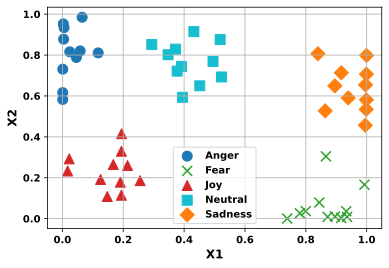

In [18]:
# Plot the data
plt.figure(figsize=(6, 4), dpi=600)
plt.rcParams.update({
    'font.size': 10,
    'font.weight': 'bold'})

# Initialize the min and max values for X1 and X2 to adjust the axes
x1_min, x1_max, x2_min, x2_max = (df['X1'].min(), df['X1'].max(), df['X2'].min(), df['X2'].max())

for emotion, marker, color, label in zip(emotions, markers, colors, labels_eng):
    emotion_df = df[df['emotion'] == emotion]
    plt.scatter(emotion_df['X1'], emotion_df['X2'],
                label=label, marker=marker, s=100, color=color)  # Adjust the size of the marker and color here

# Adjust the axes to be slightly larger than the range of the data
# plt.xlim(x1_min - 0.1, x1_max + 0.1)
# plt.ylim(x2_min - 0.1, x2_max + 0.1)

plt.ylabel('X2', fontweight='bold', fontsize=12)
plt.xlabel('X1', fontweight='bold', fontsize=12)

plt.legend()
plt.grid(True)

# Save the plot
# plt.savefig(f'points/points_raw.svg', 
#             format='svg', bbox_inches='tight')

plt.show()


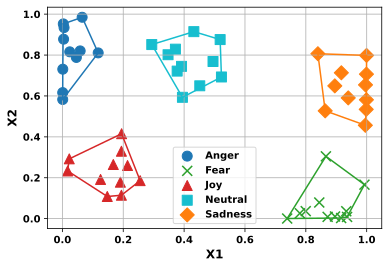

In [19]:
plt.figure(figsize=(6, 4))  # Adjust the size of the figure here

# Initialize the min and max values for X1 and X2 to adjust the axes
x1_min, x1_max, x2_min, x2_max = (df['X1'].min(), df['X1'].max(), df['X2'].min(), df['X2'].max())

for emotion, marker, color, label in zip(emotions, markers, colors, labels_eng):
    emotion_df = df[df['emotion'] == emotion]
    plt.scatter(emotion_df['X1'], emotion_df['X2'], label=label, marker=marker, s=100, color=color)  # Adjust the size of the marker and color here
    
    # Compute convex hull for a set of points
    points = emotion_df[['X1', 'X2']].values
    if len(points) > 2:  # We need at least 3 points to compute a convex hull
        hull = ConvexHull(points)
        for simplex in hull.simplices:
            plt.plot(points[simplex, 0], points[simplex, 1], color=color)

# Adjust the axes to be slightly larger than the range of the data
# plt.xlim(x1_min - 0.1, x1_max + 0.1)
# plt.ylim(x2_min - 0.1, x2_max + 0.1)

plt.ylabel('X2', fontweight='bold', fontsize=12)
plt.xlabel('X1', fontweight='bold', fontsize=12)

plt.legend()
plt.grid(True)

# Save the plot
# plt.savefig(f'points/points_lines.svg', 
#             format='svg', bbox_inches='tight')

plt.show()


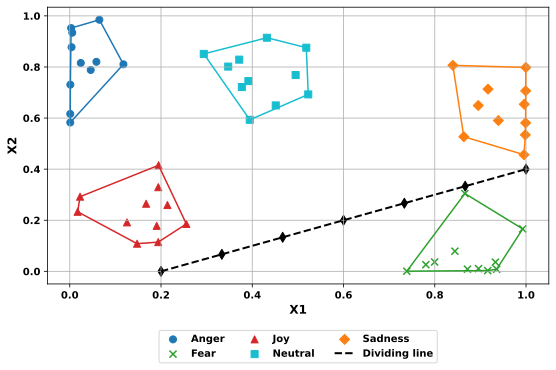

In [38]:
plt.figure(figsize=(9, 5))  # Adjust the size of the figure here

# Initialize the min and max values for X1 and X2 to adjust the axes
x1_min, x1_max, x2_min, x2_max = (df['X1'].min(), df['X1'].max(), df['X2'].min(), df['X2'].max())

for emotion, marker, color, label in zip(emotions, markers, colors, labels_eng):
    emotion_df = df[df['emotion'] == emotion]
    plt.scatter(emotion_df['X1'], emotion_df['X2'], label=label, marker=marker, s=50, color=color)  # Adjust the size of the marker and color here
    
    # Compute convex hull for a set of points
    points = emotion_df[['X1', 'X2']].values
    if len(points) > 2:  # We need at least 3 points to compute a convex hull
        hull = ConvexHull(points)
        for simplex in hull.simplices:
            plt.plot(points[simplex, 0], points[simplex, 1], color=color)

# Adjust the axes to be slightly larger than the range of the data
# plt.xlim(x1_min - 0.1, x1_max + 0.1)
# plt.ylim(x2_min - 0.1, x2_max + 0.1)

# Manually draw a line to separate the 'fear' group
# plt.plot([0.2, 1.0], [0.0, 0.4], color='black', linestyle='--')

# Manually draw a line to separate the 'fear' group
plt.plot([0.2, 1.0], [0.0, 0.4], color='black',
         linestyle='--', linewidth=2, label='Dividing line')  # Adjust linewidth to make the line bolder

# Draw seven points on the line
x_values = np.linspace(0.2, 1.0, 7)  # This generates 7 evenly spaced values between 0.1 and 0.9
y_values = np.linspace(0.0, 0.4, 7)  # The y-coordinate for all points is 0.6
plt.scatter(x_values, y_values, color='black', marker='d', s=50)  # Use scatter to draw the points

# Move the legend to an empty part of the plot
plt.legend(bbox_to_anchor=(0.5, -0.15), loc='upper center', 
           ncol=3, fontsize=10)

# # Set the limits of y-axis
# plt.ylim(-0.1,1.1)
# plt.xlim(-0.1,1.1)

plt.ylabel('X2', fontweight='bold', fontsize=12)
plt.xlabel('X1', fontweight='bold', fontsize=12)

# plt.legend()
plt.grid(True)

# Save the plot
plt.savefig(f'points/points_dividing-line.svg', 
            format='svg', bbox_inches='tight')

plt.show()


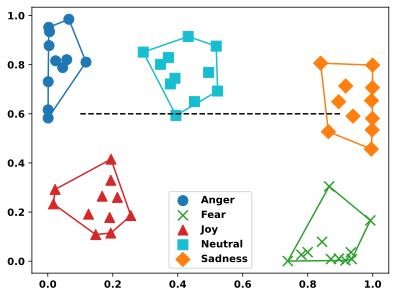

In [21]:
for emotion, marker, color, label in zip(emotions, markers, colors, labels_eng):
    emotion_df = df[df['emotion'] == emotion]
    plt.scatter(emotion_df['X1'], emotion_df['X2'], label=label, marker=marker, s=100, color=color)
    
    # Compute convex hull for a set of points
    points = emotion_df[['X1', 'X2']].values
    if len(points) > 2:  # We need at least 3 points to compute a convex hull
        hull = ConvexHull(points)
        for simplex in hull.simplices:
            plt.plot(points[simplex, 0], points[simplex, 1], color=color)

# Manually draw a line to separate the 'fear' group
plt.plot([0.1, 0.9], [0.6, 0.6], color='black', linestyle='--')

plt.legend()  # No change needed here
